In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [6]:
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/uspopulation.csv',index_col='DATE',parse_dates=True)

In [7]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [11]:
df.index.freq='MS'
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

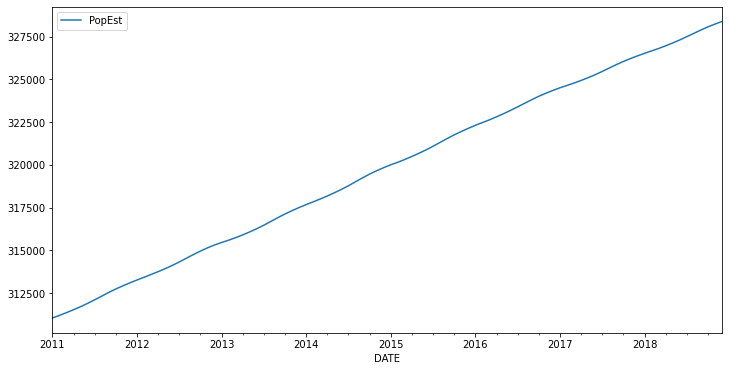

In [12]:
from pylab import rcParams

rcParams['figure.figsize']=(12,6)

df.plot();

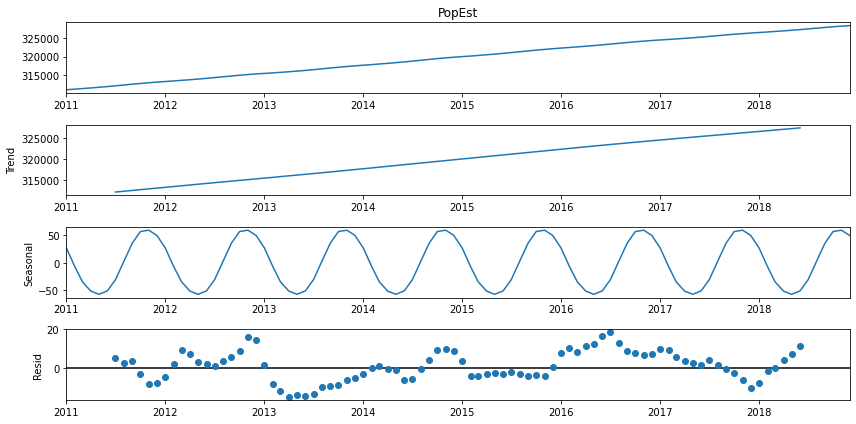

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp=seasonal_decompose(df['PopEst'],model='additive')
decomp.plot();

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [16]:
train_df=df.iloc[:84]
test_df=df.iloc[84:]

In [70]:
model=AR(train_df['PopEst'])

C:\Users\anuj\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [19]:
model_fit=model.fit(maxlag=1)

In [20]:
model_fit.aic

6.41077123703195

In [21]:
model_fit.bic

6.498199210807731

In [30]:
start=len(train_df)
end=len(train_df)+len(test_df)-1

In [31]:
predict=model_fit.predict(start=start,end=end)

In [36]:
test_df['Predicted']=predict

C:\Users\anuj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


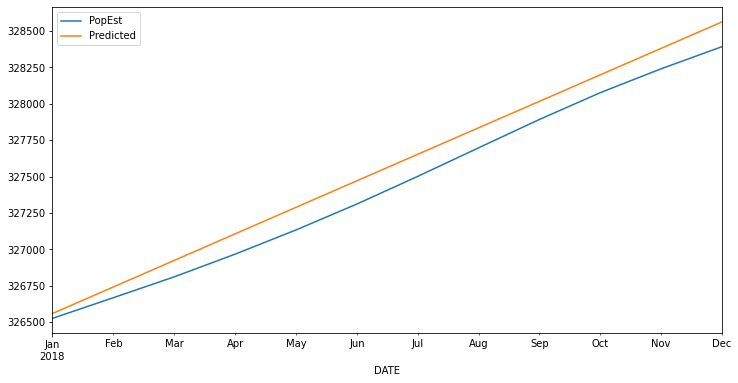

In [44]:
test_df.plot();

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mean_absolute_error(test_df['PopEst'],test_df['Predicted'])

126.75760458143971

In [51]:
mean_squared_error(test_df['PopEst'],test_df['Predicted'])

17449.714238316246

In [52]:
np.sqrt(mean_squared_error(test_df['PopEst'],test_df['Predicted']))

132.09736650787647

In [54]:
test_df['PopEst'].describe()

count        12.000000
mean     327435.500000
std         631.459421
min      326527.000000
25%      326929.000000
50%      327407.000000
75%      327939.000000
max      328393.000000
Name: PopEst, dtype: float64

In [59]:
model_fit2=model.fit(maxlag=2)

In [60]:
model_fit2.aic

5.079311773556724

In [61]:
model_fit2.bic

5.196712712447663

In [62]:
predictions2=model_fit2.predict(start=start,end=end)

In [63]:
test_df['Predictions2']=predictions2

C:\Users\anuj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


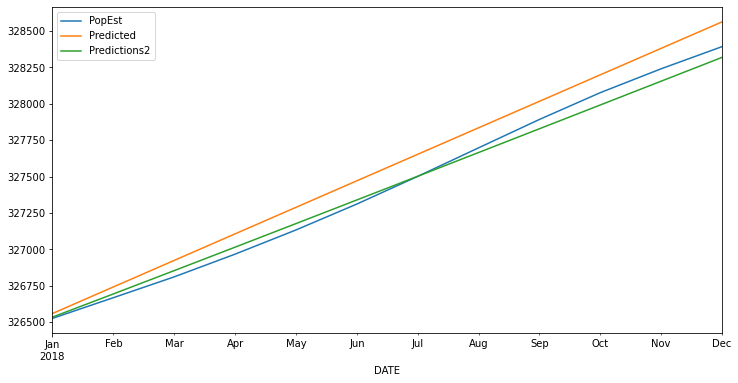

In [64]:
test_df.plot(legend=True);

In [68]:
mean_absolute_error(test_df['PopEst'],test_df['Predictions2'])



44.790636398591836

In [67]:
mean_squared_error(test_df['PopEst'],test_df['Predictions2'])

2713.258660776706

In [66]:
np.sqrt(mean_squared_error(test_df['PopEst'],test_df['Predictions2']))

52.08894950732551

In [71]:
model_fit3=model.fit(ic='t-stat')

In [72]:
model_fit3.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [73]:
model_fit3.aic

3.587820995432268

In [74]:
model_fit3.bic

3.894496434943627

In [75]:
predictions3=model_fit3.predict(start=start,end=end)

In [76]:
test_df['Predictions3']=predictions3

C:\Users\anuj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


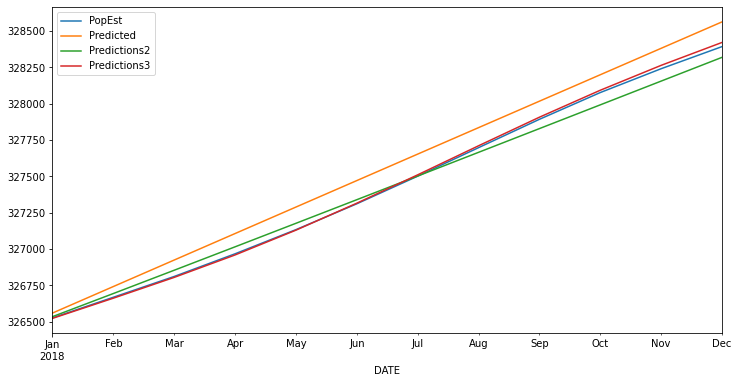

In [77]:
test_df.plot(legend=True);

In [78]:
mean_absolute_error(test_df['PopEst'],test_df['Predictions3'])



11.248891778115649

In [79]:
mean_squared_error(test_df['PopEst'],test_df['Predictions3'])

186.97381676516724

In [80]:
np.sqrt(mean_squared_error(test_df['PopEst'],test_df['Predictions3']))

13.673836943783089

# Future Forecast

In [105]:
model_f=AR(df['PopEst'])

In [89]:
model_f_fit=model_f.fit(maxlag=8)

In [90]:
model_f_fit.params

const        91.447855
L1.PopEst     2.444134
L2.PopEst    -2.322849
L3.PopEst     1.599938
L4.PopEst    -1.466282
L5.PopEst     1.138170
L6.PopEst    -0.902147
L7.PopEst     0.940295
L8.PopEst    -0.431465
dtype: float64

In [92]:
model_f_fit.aic

3.466090729457232

In [93]:
model_f_fit.bic

3.747606276557028

In [98]:
prediction_f=model_f_fit.predict(start=len(df),end=(len(df)+11))

In [99]:
prediction_f

2019-01-01    328537.134655
2019-02-01    328675.917680
2019-03-01    328818.863470
2019-04-01    328973.057085
2019-05-01    329142.516074
2019-06-01    329325.479711
2019-07-01    329516.233780
2019-08-01    329709.938339
2019-09-01    329899.389568
2019-10-01    330077.704806
2019-11-01    330242.358830
2019-12-01    330394.543508
Freq: MS, dtype: float64

In [106]:
model_f_fit=model_f.fit()

In [107]:
model_f_fit.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

In [108]:
model_f_fit.aic

3.200236966102997

In [109]:
model_f_fit.bic

3.605373099243549

In [110]:
prediction_f=model_f_fit.predict(start=len(df),end=(len(df)+11))

In [111]:
prediction_f

2019-01-01    328537.420464
2019-02-01    328673.215492
2019-03-01    328810.443223
2019-04-01    328957.592937
2019-05-01    329117.335910
2019-06-01    329289.277232
2019-07-01    329470.144261
2019-08-01    329655.073622
2019-09-01    329839.483030
2019-10-01    330015.435011
2019-11-01    330175.676053
2019-12-01    330322.580257
Freq: MS, dtype: float64